# Import thư viện và dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Link dataset: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated
data_path = '/content/drive/MyDrive/data_analysis/life/Life-Expectancy-Data-Updated.csv'

df = pd.read_csv(data_path)
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


# Các thông tin cơ bản của dữ liệu

In [ ]:
# Kiểm tra số record, số features, kiểu dữ liệu của các features, dữ liệu rỗng trong mỗi cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

- Từ info ta có thể thấy dữ liệu bao gồm 21 đặc trưng, 2864 hàng, và không có dữ liệu khuyết.
- Bộ dữ liệu đã thực hiện điền khuyết bằng các chiến thuật sau (bộ dữ liệu đã thực hiện theo chiến thuật này, nhóm không thực hiện phần này):
    + Điền dữ liệu bằng giá trị trung bình ba năm gần nhất của chính quốc gia đó.
    + Điền dữ liệu bằng giá trị trung bình của Khu vực nếu cả ba năm gần nhất đều trống.

In [ ]:
# Kiểm tra số lượng đặc trưng của mỗi kiểu dữ liệu
datatype_counts = df.dtypes.value_counts()

print(datatype_counts)

float64    11
int64       8
object      2
Name: count, dtype: int64


In [ ]:
# Kiểm tra dataset có chứa dữ liệu lặp hay không.
if df.duplicated().any():
    print("Có hàng dữ liệu bị lặp.")
else:
    print("Không có hàng nào bị lặp.")

Không có hàng nào bị lặp.


Từ các thông tin cơ bản, ta thấy được dữ liệu đã được làm sạch tương đối tốt, cũng như số biến có kiểu dữ liệu số chiếm ưu thế

# Tiền xử lý dữ liệu

In [ ]:
# Chuyển các biến số có số lượng giá trị khác nhau thấp hơn 5 thành kiểu phân loại
threshold = 5
for col in df.columns:
  if df[col].nunique() <= threshold:
    df[col] = df[col].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
# Kiểm tra số lượng đặc trưng của mỗi kiểu dữ liệu sau khi chuyển dữ liệu có số giá trị thấp sang kiểu object
datatype_counts = df.dtypes.value_counts()

print(datatype_counts)

float64    11
int64       6
object      4
Name: count, dtype: int64


In [ ]:
# Lọc các biến phân loại để sử dụng trong training
categorical_features = df.select_dtypes(include='object').columns
categorical_features = [
    col for col in categorical_features
]

# Hiển thị dữ liệu với các biến phân loại
df[categorical_features].head()

,Country,Region,Economy_status_Developed,Economy_status_Developing
0,Turkiye,Middle East,0,1
1,Spain,European Union,1,0
2,India,Asia,0,1
3,Guyana,South America,0,1
4,Israel,Middle East,1,0


Do 1 quốc gia chỉ có một trong hai trạng thái là đã hoặc đang phát triển. Dữ liệu cũng biểu diễn nếu Economy_status_Developed = 0 thì Economy_status_Developing = 1 và ngược lại. Nên ta sẽ bỏ đi biến Economy_status_Developing

In [ ]:
categorical_features.remove('Economy_status_Developing')

In [ ]:
# Lọc các biến số
number_features = df.select_dtypes(include='number').columns
number_features = number_features.drop('Life_expectancy') # Biến Life_expectancy là biến mục tiêu
number_features = [
    col for col in number_features
]
df[number_features].head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8
1,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7
2,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0
3,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9
4,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8


Bước tiền xử lý dữ liệu đã chọn ra các biến số và biến phân loại ban đầu với chiến thuật:


*   Các biến số có số giá trị unique <= 5 sẽ chuyển thành kiểu object
*   Các biến object có số giá trị unique > 10 sẽ không được sử dụng trong huấn luyện.





In [ ]:
print(f"Các biến phân loại: {categorical_features}")
print(f"Các biến số: {number_features}")

Các biến phân loại: ['Country', 'Region', 'Economy_status_Developed']
Các biến số: ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling']


# Lựa chọn đặc trưng

## Phân tích anova với các biến phân loại

In [ ]:
def anova_analysis(df, target, features):
    p_values = {}
    for feature in features:
        unique_categories = df[feature].unique()
        groups = [df[df[feature] == cate][target].values for cate in unique_categories]

        f_statistic, p_value = f_oneway(*groups)

        p_values[feature] = {
            'unique_categories': unique_categories,
            'p_value': p_value
        }
    return p_values

In [ ]:
p_values = anova_analysis(df, target = 'Life_expectancy', features=categorical_features)
choose_categorical_features = []

for feature, result in p_values.items():
    print(f"ANOVA analysis for {feature}:")
    print(f"    Unique Values: {result['unique_categories']}")
    print(f"    p-value: {result['p_value']}")

    if result['p_value'] < 0.001:
        print(f"    {feature} có sự khác biến đang kể giữa các loại")
        choose_categorical_features.append(feature)
    else:
        print(f"    {feature} không có sự khác biến đang kể giữa các loại")
    print("*" * 50)

print(f"Các biến phân loại đã chọn: {choose_categorical_features}")

ANOVA analysis for Country:
    Unique Values: ['Turkiye' 'Spain' 'India' 'Guyana' 'Israel' 'Costa Rica'
 'Russian Federation' 'Hungary' 'Jordan' 'Moldova' 'Brazil' 'Malta'
 'Bahamas, The' 'Ukraine' 'Switzerland' 'Norway' 'Finland' 'Comoros'
 'Japan' 'Gabon' 'Ghana' 'Philippines' 'Congo, Rep.' 'Madagascar'
 'Estonia' 'Belize' 'Kazakhstan' 'Cameroon' 'Zimbabwe' 'Bhutan'
 'South Africa' 'Eritrea' 'Germany' 'Saudi Arabia' 'Kiribati' 'Seychelles'
 'Singapore' 'Togo' 'Denmark' 'Gambia, The' 'Sweden' 'Austria'
 'Kyrgyz Republic' 'Grenada' 'Brunei Darussalam' 'Greece' 'Uruguay'
 'Croatia' 'Romania' 'Central African Republic' 'Algeria' 'Yemen, Rep.'
 'Armenia' 'St. Vincent and the Grenadines' 'Kenya'
 'Micronesia, Fed. Sts.' 'Antigua and Barbuda' 'Nepal' 'Lithuania'
 'Vanuatu' 'Afghanistan' 'Kuwait' 'Argentina' 'Panama' 'Oman' 'France'
 'Bosnia and Herzegovina' 'Mauritania' 'Somalia' 'Azerbaijan' 'Maldives'
 'Guinea-Bissau' 'Solomon Islands' 'Congo, Dem. Rep.' 'Namibia' 'Eswatini'
 'Nigeria' '

## Phân tích hệ số tương quan giữa các biến số với target

In [ ]:
def correlation_analysis(df, target, features):
    correlation_values = {}
    for feature in features:
        correlation = df[feature].corr(df[target])

        correlation_values[feature] = correlation
    return correlation_values

correlation_values = correlation_analysis(df, target = 'Life_expectancy', features=number_features)

correlation_values_sorted = sorted(correlation_values.items(), key=lambda x: abs(x[1]), reverse=True)
print("Chỉ số tương quan của các biến số:")
for feature, result in correlation_values_sorted:
    print(f"    {feature}: {result}")
print("*" * 50)

threshold = 0.58
choose_number_features = [feature for feature, result in correlation_values_sorted if abs(result) > threshold]
print(f"Các biến số đã chọn: {choose_number_features}")


Chỉ số tương quan của các biến số:
    Adult_mortality: -0.9453603642730647
    Under_five_deaths: -0.9204191336402633
    Infant_deaths: -0.9200319194470854
    Schooling: 0.7324844688915007
    Polio: 0.6412174553454272
    Diphtheria: 0.6275413923742557
    BMI: 0.5984233246973866
    GDP_per_capita: 0.5830897215324402
    Incidents_HIV: -0.5530274644851232
    Measles: 0.490018589409442
    Thinness_ten_nineteen_years: -0.46782449501929146
    Thinness_five_nine_years: -0.4581662274600834
    Hepatitis_B: 0.4178044320150778
    Alcohol_consumption: 0.3991591075791727
    Year: 0.17435894328215848
    Population_mln: 0.026297879724181544
**************************************************
Các biến số đã chọn: ['Adult_mortality', 'Under_five_deaths', 'Infant_deaths', 'Schooling', 'Polio', 'Diphtheria', 'BMI', 'GDP_per_capita']


## Phân tích độ tương quan

In [ ]:
df[number_features].corr()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
Year,1.000000,-0.172402,-0.176393,-0.158660,-0.000611,0.176824,0.085945,0.161422,0.139858,0.145143,-0.081743,0.040998,0.015158,-0.044901,-0.048038,0.150539
Infant_deaths,-0.172402,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513
Under_five_deaths,-0.176393,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196
Adult_mortality,-0.158660,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035
Alcohol_consumption,-0.000611,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728
Hepatitis_B,0.176824,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643
Measles,0.085945,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391
BMI,0.161422,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475
Polio,0.139858,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765
Diphtheria,0.145143,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621


<Axes: >

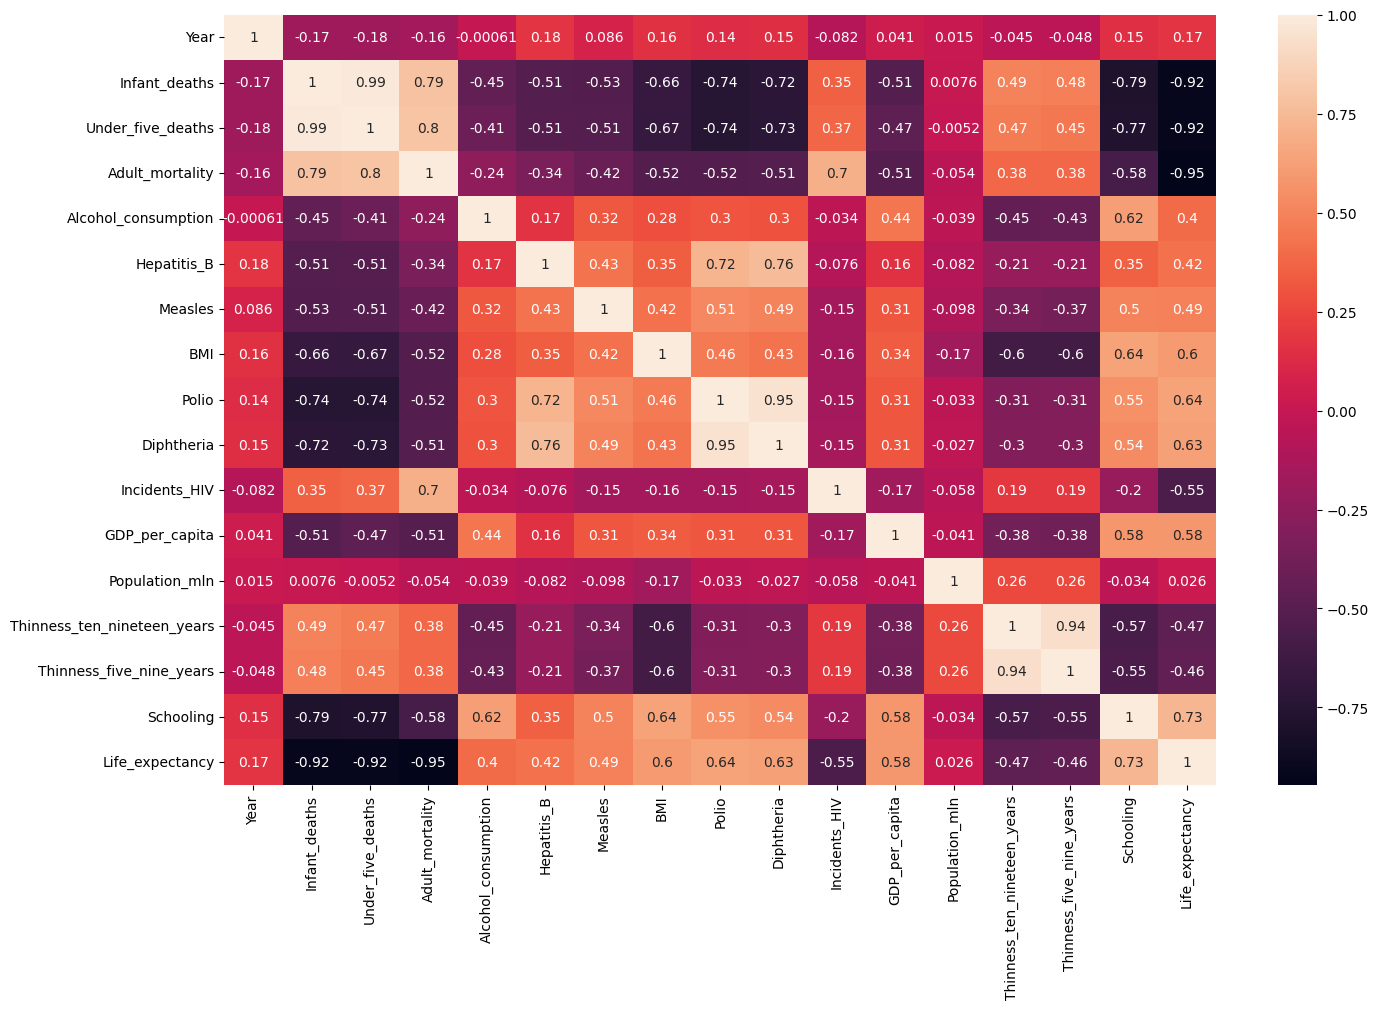

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df[number_features + ['Life_expectancy']].corr(), annot=True)

Từ biểu đồ heatmap về độ tương quan giữa các biến số, ta có thể thấy các điều sau:
*   Các đặc trưng tương quan mạnh 'Adult_mortality', 'Under_five_deaths', 'Infant_deaths', 'Schooling', 'Polio', 'Diphtheria', 'BMI', 'GDP_per_capita'
*   Hai đặc trưng  'Under_five_deaths', 'Infant_deaths' tương quan mạnh lẫn nhau. Hai đặc trưng 'Polio', 'Diphtheria' cũng có tương quan mạnh. Điều này dẫn đến có khả năng xảy ra hiện tượng đa cộng tuyến.
*   Các biến 'Adult_mortality', 'Under_five_deaths', 'Infant_deaths' có quan hệ tương quan âm mạnh với các biến về y tế, kinh tế, giáo dục.





## Trực quan bằng Regression Plot

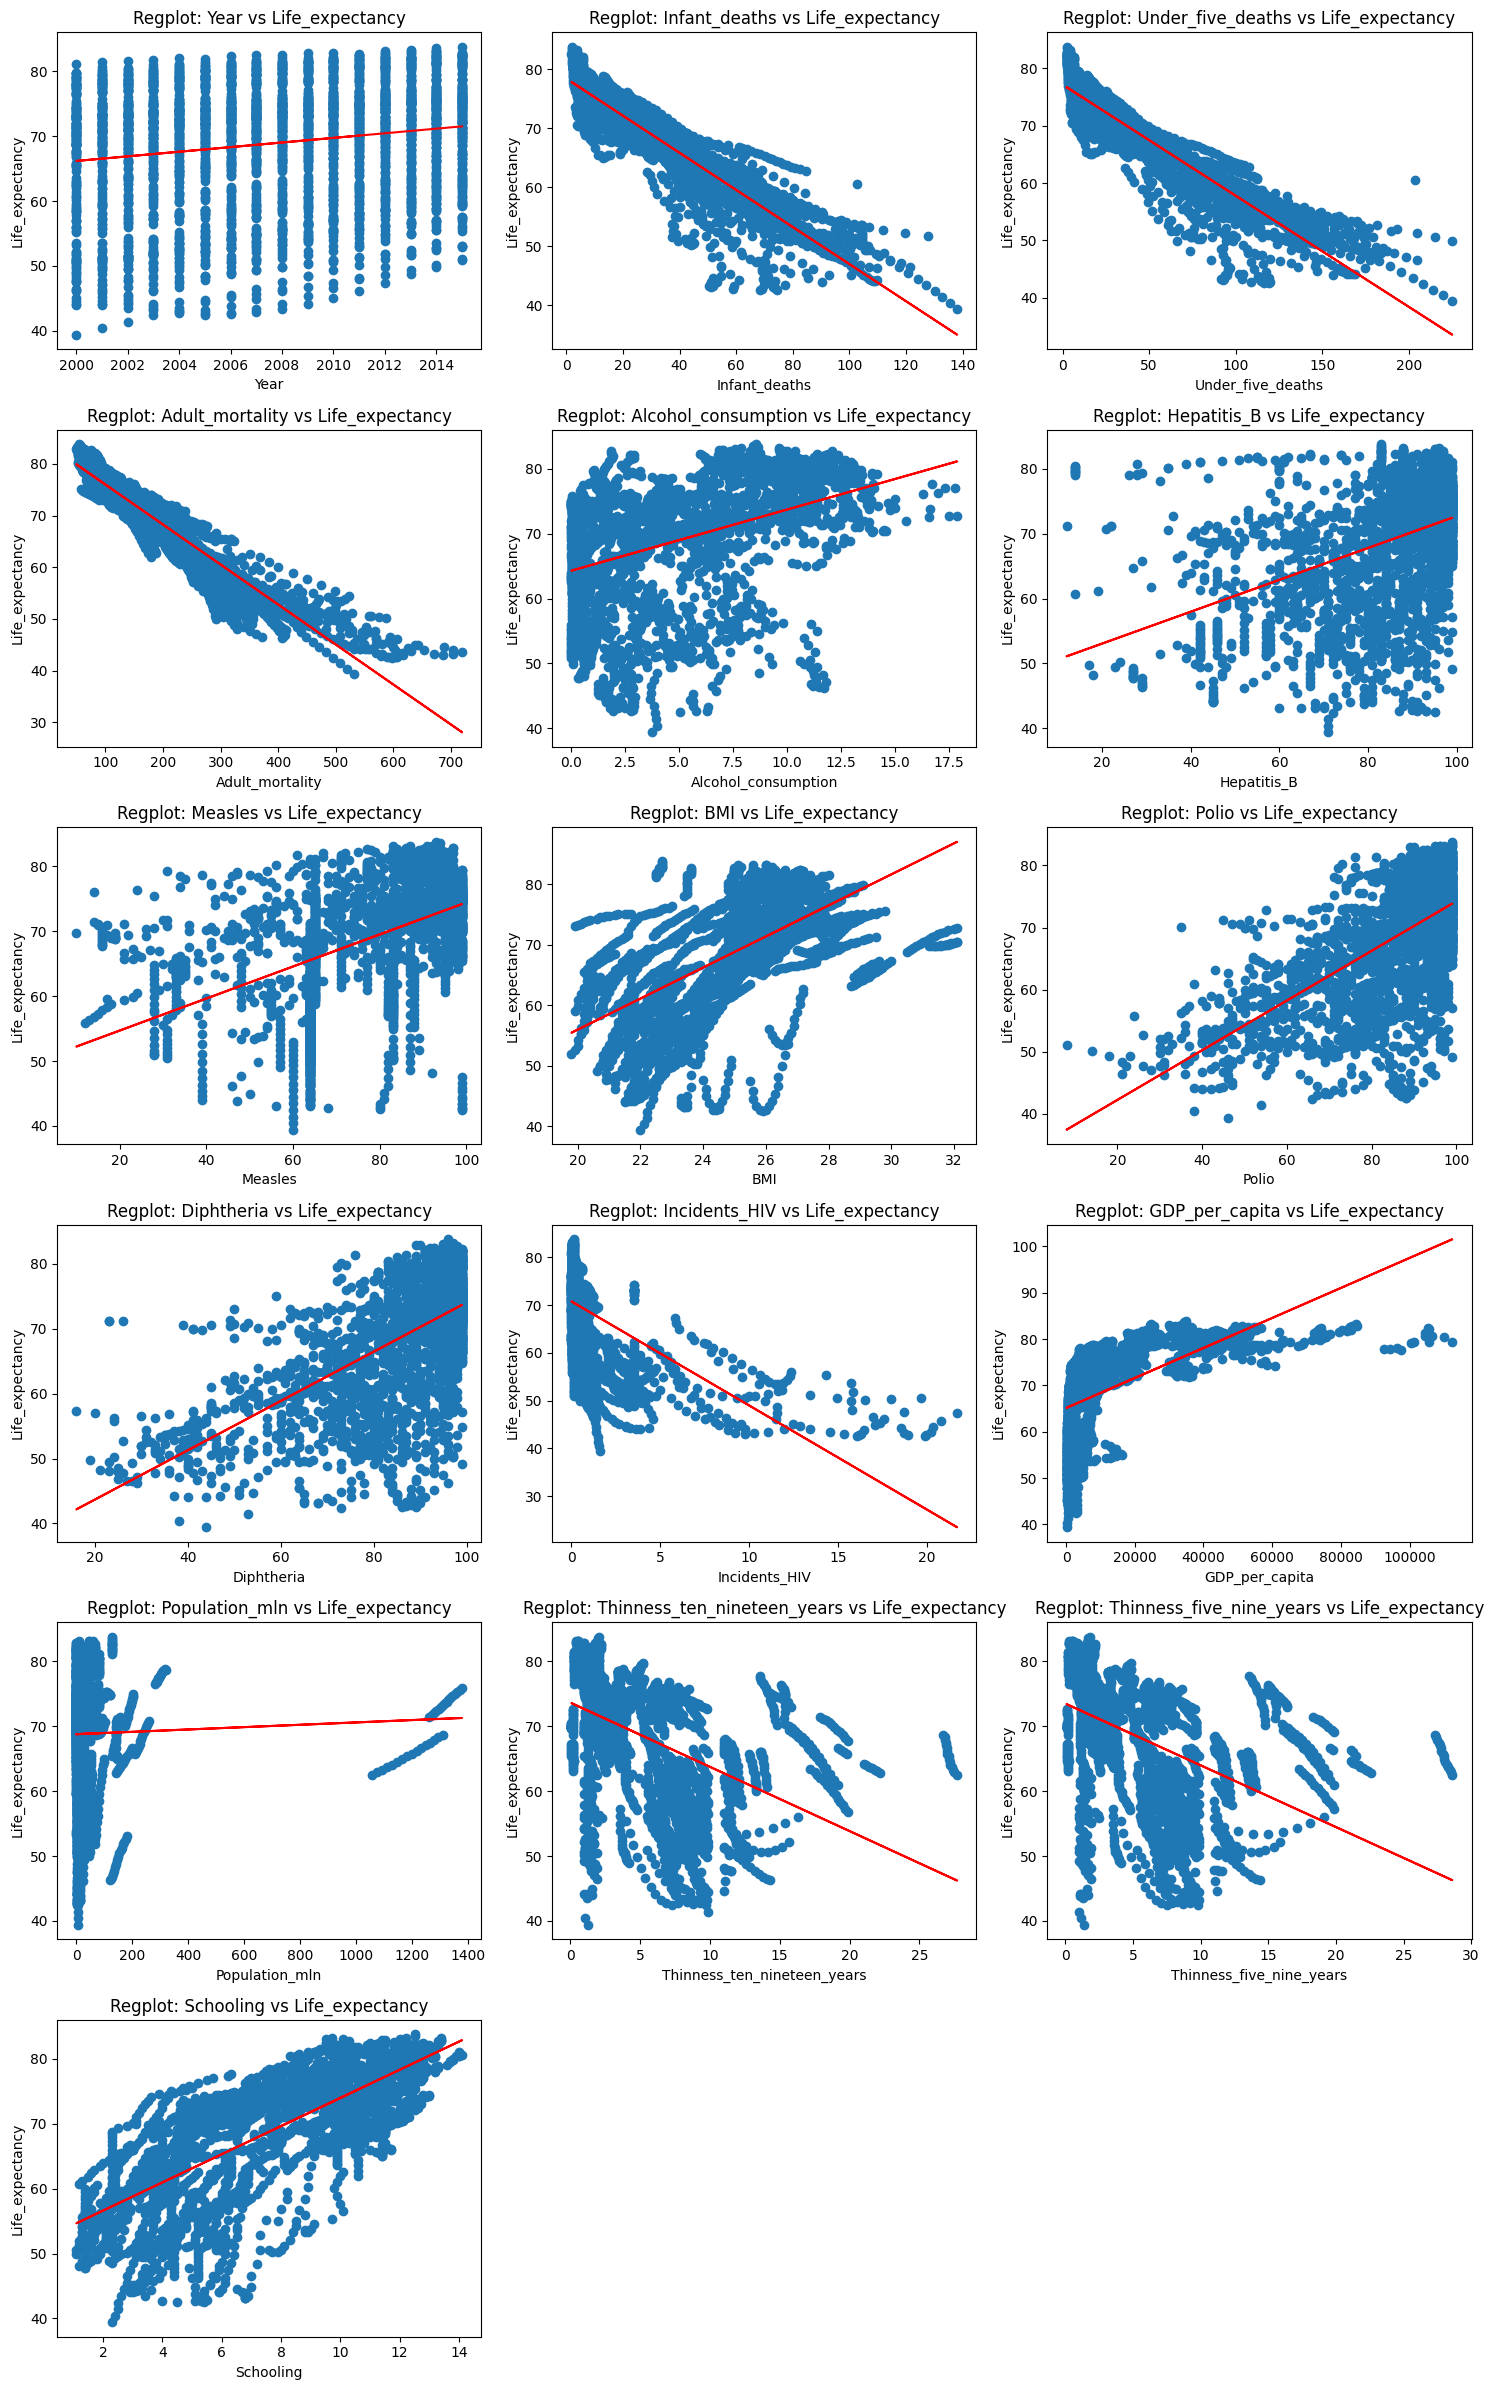

In [ ]:
# Tạo subplot
n_features = len(number_features)
cols = 3  # Số đồ thị con mỗi hàng
rows = (n_features + cols - 1) // cols

plt.figure(figsize=(15, 4 * rows))
for i, col in enumerate(number_features, 1):
    plt.subplot(rows, cols, i)
    plt.scatter(df[col],df['Life_expectancy'], label=col)
    slope, intercept = np.polyfit(df[col], df['Life_expectancy'], 1)
    line = slope * df[col] + intercept
    plt.title(f'Regplot: {col} vs Life_expectancy')
    plt.plot(df[col], line, color='red')
    plt.xlabel(col)
    plt.ylabel('Life_expectancy')

plt.tight_layout()
plt.show()

Từ các biểu đồ ta có thể thấy, với các biến 'Adult_mortality', 'Under_five_deaths', 'Infant_deaths', các điểm dữ liệu nằm khá gần đường hồi quy cho thấy mối quan hệ chặt chẽ với biến mục tiêu Life_expectancy. Với các biến 'Schooling', 'Polio', 'Diphtheria', 'BMI', các điểm dữ liệu tương đối phân tán, nhưng vẫn thể hiện xu hướng đồng biến khá rõ ràng

## Kết quả phân tích thăm dò

In [ ]:
# Tính trung bình Life_expectancy theo từng năm
aggregated_life_expectancy = df.groupby("Year")["Life_expectancy"].mean().reset_index()

# Tính trung bình Life_expectancy theo từng năm và khu vực
aggregated_life_expectancy_region = df.groupby(["Year", "Region"])["Life_expectancy"].mean().reset_index()

# Tính trung bình GDP_per_capita theo từng khu vực
average_gdp_region = df.groupby("Region")["GDP_per_capita"].mean().reset_index()

# Tính trung bình Life_expectancy theo từng khu vực
average_life_expectancy_region = df.groupby("Region")["Life_expectancy"].mean().reset_index()

# Tính trung bình Schooling theo từng khu vực
average_schooling_region = df.groupby("Region")["Schooling"].mean().reset_index()

# Tính trung bình Adult_mortality theo từng khu vực
average_Adult_mortality_region = df.groupby("Region")["Adult_mortality"].mean().reset_index()

# Tạo biểu đồ dạng grid với plotly: 2 row, 3 column
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "scatter"}, {"type": "heatmap"}, {"type": "bar"}],
           [{"type": "box"}, {"type": "box"}, {"type": "table"}]], # Các kiểu của các plot
    subplot_titles=(
        "Life Expectancy theo các năm", # Biểu đồ row 1, col 1
        "Biểu đồ tương quan giữa các biến", # Biểu đồ row 1, col 2
        "Life Expectancy với tỉ lệ tử vong người lớn", # Biểu đồ row 1, col 3
        "Life expectancy với trạng thái phát triển", # Biểu đồ row 2, col 1
        "Life expectancy với khu vực lãnh thổ", # Biểu đồ row 2, col 2
        "Những quốc gia có Life expectancy cao nhất" # Biểu đồ row 2, col 2
    ) # Title của các biểu đồ
)

# Biểu đồ row 1 col 1 Life Expectancy theo các năm
for region in aggregated_life_expectancy_region["Region"].unique():
    region_data = aggregated_life_expectancy_region[aggregated_life_expectancy_region["Region"] == region]
    fig.add_trace(
        go.Scatter(x=region_data["Year"], # Trục x: Năm
                   y=region_data["Life_expectancy"], # Trục y: Trung bình của Life_expectancy
                   mode='lines+markers',
                   name=f"Life_expectancy ({region})"),
        row=1, col=1
    )

fig.update_xaxes(title_text="Year", row=1, col=1) # Title trục X
fig.update_yaxes(title_text="Life Expectancy", row=1, col=1) # Title trục Y

# Biểu đồ row 1 col 2 tương quan giữa các biến "Life_expectancy", "Schooling", "GDP_per_capita", "Adult_mortality", "Diphtheria", "Polio"
correlation_data = df[["Life_expectancy", "Schooling", "GDP_per_capita", "Adult_mortality", "Diphtheria", "Polio"]].corr()
fig.add_trace(
    go.Heatmap(
        z=correlation_data.values, # Giá trị tương quan để chọn màu
        x=correlation_data.columns, # Tên biến tương quan
        y=correlation_data.columns, # Tên biến tương quan
        colorbar=dict(title="Correlation"),
        colorscale = 'Viridis',
        zmin=-1, zmax=1,
    ),
    row=1, col=2
)

# In chi tiết các giá trị cho từng ô trong heatmap
for i in range(len(correlation_data)):
    for j in range(len(correlation_data)):
        fig.add_annotation(
            x=correlation_data.columns[j],
            y=correlation_data.columns[i],
            text=f"{correlation_data.values[i, j]:.2f}",
            showarrow=False,
            font=dict(color="white" if abs(correlation_data.values[i, j]) > 0.5 else "black"),
            xref="x2",
            yref="y2"
        )

# Tính đường thẳng regression bằng numpy.polyfit
x_all = df["Adult_mortality"]
y_all = df["Life_expectancy"]
slope, intercept = np.polyfit(x_all, y_all, 1)
regression_line_all = slope * x_all + intercept

# Biểu đồ row 1 col 3 Tỉ lệ tử vong ở người trưởng thành với các khu vực
for region in average_Adult_mortality_region["Region"].unique():
    region_data = df[df["Region"] == region]
    fig.add_trace(
        go.Scatter(
            x=region_data["Adult_mortality"], # Trục X: Tỉ lệ tự vong ở người trưởng thành
            y=region_data["Life_expectancy"], # Trục Y: Tuổi thọ
            mode="markers",
            name=f"{region} (Scatter)",
            marker=dict(size=10),
        ),
        row=1, col=3
    )

# Thêm đường thẳng regression vào biểu đồ
fig.add_trace(
    go.Scatter(
        x=x_all,
        y=regression_line_all,
        mode="lines",
        name="Regression Line",
        line=dict(color="red", width=3),
    ),
    row=1, col=3
)

fig.update_xaxes(title_text="Adult_mortality", row=1, col=3) # Trục X
fig.update_yaxes(title_text="Life Expectancy", row=1, col=3) # Trục Y

# Biểu đồ row 2 col 1 Life expectancy vs trạng thái phát triển
for status in df['Economy_status_Developed'].unique():
    box_trace = go.Box(
        y=df[df['Economy_status_Developed'] == status]['Life_expectancy'],
        name=str(status),
        boxpoints="all",
        marker=dict(size=5),
    )
    fig.add_trace(box_trace, row=2, col=1)

fig.update_xaxes(title_text="Develop status", row=2, col=1) # Title trục X
fig.update_yaxes(title_text="Life Expectancy", row=2, col=1) # Title trục Y

# Biểu đồ row 2 col 1 Life expectancy vs khu vực
for region in df["Region"].unique():
    box_trace = go.Box(
        y=df[df["Region"] == region]['Life_expectancy'],
        name=str(region),
        boxpoints="all",
        marker=dict(size=5),
    )
    fig.add_trace(box_trace, row=2, col=2)

# Láy trung bình life expectancy các quốc gia
top_countries = df.groupby("Country")[["Life_expectancy", "GDP_per_capita", "Schooling", "Adult_mortality", "Economy_status_Developed"]].mean().reset_index()
# Sort và lấy top 10 quốc gia có life expectancy cao nhất
top_countries = top_countries.sort_values(by="Life_expectancy", ascending=False).head(10)
# Lọc lấy region của các quốc gia
country_region = df[df["Country"].isin(top_countries["Country"])]
region_data = country_region.groupby("Country")["Region"].first().reset_index()

# Kết hợp cả hai
top_countries_with_region = pd.merge(top_countries, region_data, on="Country")

fig.add_trace(
    go.Table(
        header=dict(values=["Country", "Trung bình Life Expectancy", "GDP đầu người", "Học vấn", "Tỉ lệ tử vong người lớn", "Trạng thái kinh tế", "Khu vực"],
                    align='left'),
        cells=dict(values=[
            top_countries_with_region["Country"],
            top_countries_with_region["Life_expectancy"],
            top_countries_with_region["GDP_per_capita"],
            top_countries_with_region["Schooling"],
            top_countries_with_region["Adult_mortality"],
            top_countries_with_region["Economy_status_Developed"],
            top_countries_with_region["Region"]
        ], align='left')
    ),
    row=2, col=3
)

# Cấu hình đồ thị,
fig.update_layout(
    height=1200, width=1400,
    title_text="Phân tích thăm dò dữ liệu",
    title_font=dict(size=50),
    title_x = 0.5,
    margin=dict(l=25, r=25, t=100, b=40),
    template="plotly_white",
    legend=dict(
        title="Regions",
        orientation="h",
        yanchor="bottom",
        y=-0.5,
        xanchor="center",
        x=0.5,
        bordercolor="black",
        borderwidth=1
    )
)

# Show the plot
fig.show()


In [ ]:
fig.write_html("dashboard.html") # Lưu fig dưới dạng html để thuận tiện chụp hình kết quả

1. Life Expectancy theo các năm (Biểu đồ trên cùng bên trái)
- Tuổi thọ trung bình toàn cầu tăng dần qua các năm từ 2000 đến 2015.
- Các khu vực như Oceania và European Union có tuổi thọ trung bình cao nhất, trong khi Africa có kỳ vọng sống thấp nhất nhưng vẫn có sự cải thiện.
2. Biểu đồ tương quan giữa các biến số (Biểu đồ trên cùng giữa)
- Life_expectancy có tương quan tích cực vừa và mạnh với các yếu tố như: Schooling (0.73), GDP per capita (0.58), Polio (0.64) và Diphtheria (0.63)
- Adult Mortality (-0.95): Có tương quan âm rất mạnh, nghĩa là tỷ lệ tử vong người lớn cao làm giảm kỳ vọng sống.
3. Life Expectancy và Tỷ lệ tử vong người lớn (Biểu đồ trên cùng bên phải)
- Có một mối quan hệ tuyến tính âm rõ ràng: khi tỷ lệ tử vong người lớn tăng, tuổi thọ trung bình giảm.
- Regression plot minh họa mối quan hệ chặt chẽ giữa hai yếu tố này.
4. Life Expectancy với trạng thái phát triển (Biểu đồ dưới cùng bên trái)
- Trạng thái phát triển (Develop status):
- Các quốc gia phát triển (Developed) có tuổi thọ trung bình cao hơn (khoảng 80 tuổi) với mức biến động thấp.
- Các quốc gia đang phát triển (Developing) có tuổi thọ trung bình thấp hơn, dao động mạnh hơn.
5. Life Expectancy với khu vực lãnh thổ (Biểu đồ dưới cùng giữa)
- Kỳ vọng sống trung bình khác nhau đáng kể giữa các khu vực:
- Oceania và European Union: tuổi thọ trung bình.
- Africa: Thấp nhất, với mức độ biến động lớn hơn có thể là do chênh lệch phát triển giữa các quốc gia trong khu vực.
- Các khu vực khác như Asia, South America, và North America ở mức trung bình cao, tương đối ổn định.
6. Những quốc gia có Life Expectancy cao nhất (Bảng dưới cùng bên phải)
- Japan dẫn đầu với tuổi thọ trung bình 82.45 tuổi, tiếp theo là Switzerland (81.67 tuổi).
- Các quốc gia có kỳ vọng sống cao nhất thường thuộc các khu vực phát triển như - Rest of Europe và European Union, với GDP đầu người và trình độ học vấn cao.

# Huấn luyện mô hình

## Kịch bản sử dụng toàn bộ dữ liệu

In [ ]:
# Xử lý chuẩn hóa dữ liệu bằng standard scaler và one hot encoding
X = df[categorical_features + number_features]
y = df['Life_expectancy']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_features]) # One hot encoding

columns_encoded = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_data, columns=columns_encoded)
X = pd.concat([X.drop(columns=categorical_features), encoded_df], axis=1) # Thêm các cột đã mã hóa vào X

scaler = StandardScaler()
X[number_features] = scaler.fit_transform(X[number_features]) # Standard scaler

### Huấn luyện sử dụng mô hình Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16) # Chia tập train, test theo tỉ lệ 4:1, randomstate: 16

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Squared Error: 0.20902509687978765
R-squared score: 0.9976882746723215


In [ ]:
from scipy.stats import gaussian_kde

# Hàm vẽ biểu đồ phân phối giữa giá trị thực tế và giá trị dự đoán
def plot_distribution(y_true, y_pred):
    # Tính mật độ  cho giá trị thực tế và dự đoán
    kde_actual = gaussian_kde(y_true)
    kde_predicted = gaussian_kde(y_pred)

    # Tạo khoảng giá trị để vẽ đường phân phối
    x_range = np.linspace(min(min(y_true), min(y_pred)), max(max(y_true), max(y_pred)), 100)

    plt.figure(figsize=(8, 5))

    # Đường phân phối của y_true (giá trị thực tế)
    plt.plot(x_range, kde_actual(x_range), label="Thực tế", color="blue", linewidth=2)

    # Đường phân phối của y_pred (giá trị dự đoán)
    plt.plot(x_range, kde_predicted(x_range), label="Dự đoán", color="red", linewidth=2)

    plt.title("So sánh phân phối giữa giá trị thực tế và dự đoán", fontsize=14)
    plt.xlabel("Giá trị")
    plt.ylabel("Mật độ")
    plt.legend()
    plt.show()

### Huấn luyện sử dụng mô hình Ridge Regression

Best alpha (MSE): 0.001
Best alpha (R²): 0.001


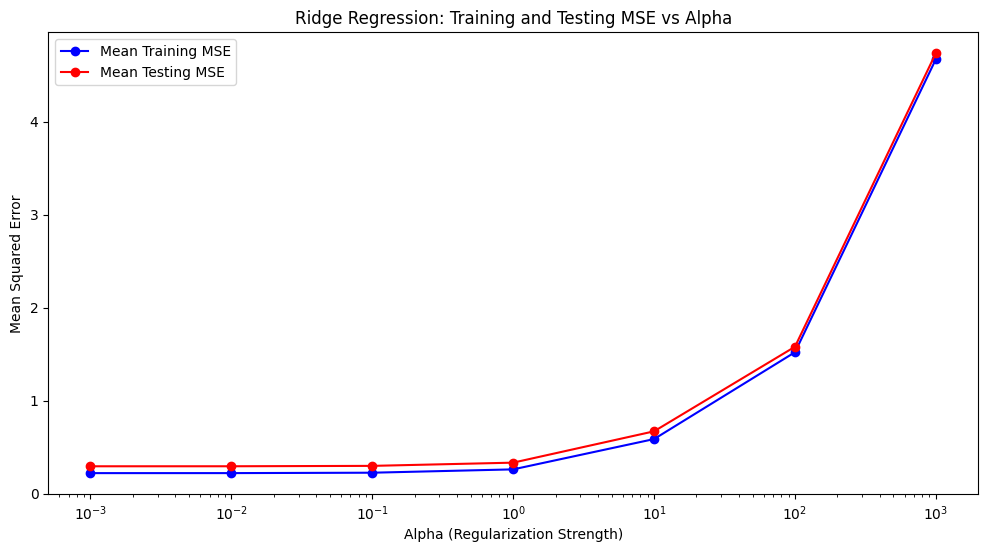

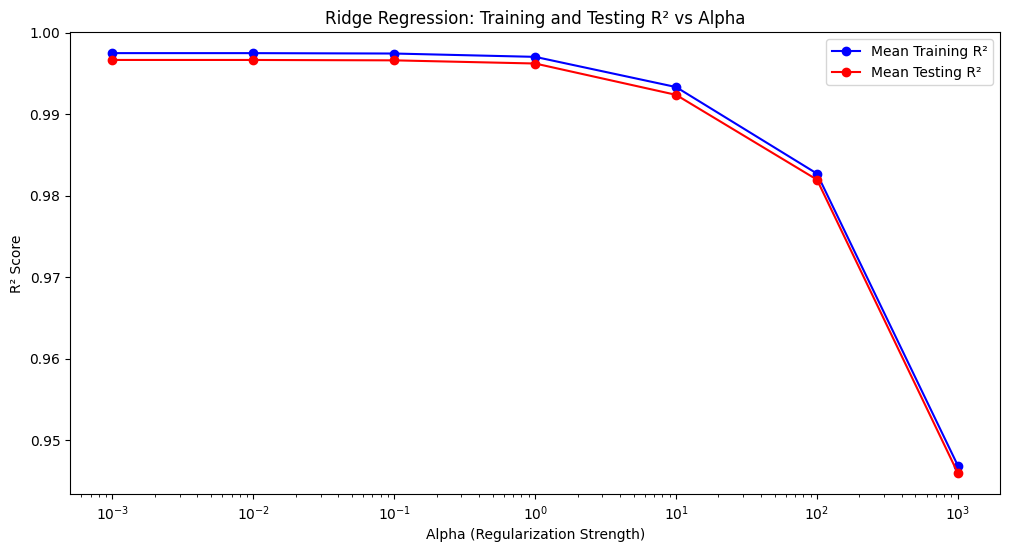

Test MSE trong best MSE alpha: 0.20897850321140346
Test R2 trong best MSE alpha: 0.9976887899777318


In [ ]:
def perform_grid_search(scoring_metric):
    grid_search = GridSearchCV(
        estimator=ridge,
        param_grid=param_grid,
        scoring=scoring_metric,
        cv=5,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    return grid_search
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'alpha': alphas}

ridge = Ridge() # Mô hình Ridge

# Grid search cho độ đo mse
grid_search_mse = perform_grid_search('neg_mean_squared_error')
mean_train_mse_scores = -grid_search_mse.cv_results_['mean_train_score']
mean_test_mse_scores = -grid_search_mse.cv_results_['mean_test_score']
best_alpha_mse = grid_search_mse.best_params_['alpha']
print(f"Best alpha (MSE): {best_alpha_mse}")

# Grid search cho độ đo r2
grid_search_r2 = perform_grid_search('r2')
mean_train_r2_scores = grid_search_r2.cv_results_['mean_train_score']
mean_test_r2_scores = grid_search_r2.cv_results_['mean_test_score']
best_alpha_r2 = grid_search_r2.best_params_['alpha']
print(f"Best alpha (R²): {best_alpha_r2}")

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_mse_scores, marker="o", label="Mean Training MSE", color="blue")
plt.plot(alphas, mean_test_mse_scores, marker="o", label="Mean Testing MSE", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Training and Testing MSE vs Alpha')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_r2_scores, marker="o", label="Mean Training R²", color="blue")
plt.plot(alphas, mean_test_r2_scores, marker="o", label="Mean Testing R²", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Training and Testing R² vs Alpha')
plt.legend()
plt.show()

# Sử dụng best metrics để huấn luyện
best_ridge_mse = grid_search_mse.best_estimator_
y_test_pred_mse = best_ridge_mse.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred_mse)
print(f"Test MSE trong best MSE alpha: {test_mse}")

best_ridge_r2 = grid_search_r2.best_estimator_
y_test_pred_r2 = best_ridge_r2.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_r2)
print(f"Test R2 trong best MSE alpha: {test_r2}")


## Kịch bản sử dụng các đặc trưng đã được lựa chọn

In [ ]:
X = df[np.concatenate([choose_number_features, choose_categorical_features])]
y = df['Life_expectancy']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[choose_categorical_features])

columns_encoded = encoder.get_feature_names_out(choose_categorical_features)
encoded_df = pd.DataFrame(encoded_data, columns=columns_encoded)
X = pd.concat([X.drop(columns=choose_categorical_features), encoded_df], axis=1)

scaler = StandardScaler()
X[choose_number_features] = scaler.fit_transform(X[choose_number_features])

### Huấn luyện sử dụng mô hình Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Squared Error: 0.2587469379231983
R-squared score: 0.9971383730528764


### Huấn luyện sử dụng mô hình Ridge Regression

Best alpha (MSE): 0.01
Best alpha (R²): 0.01


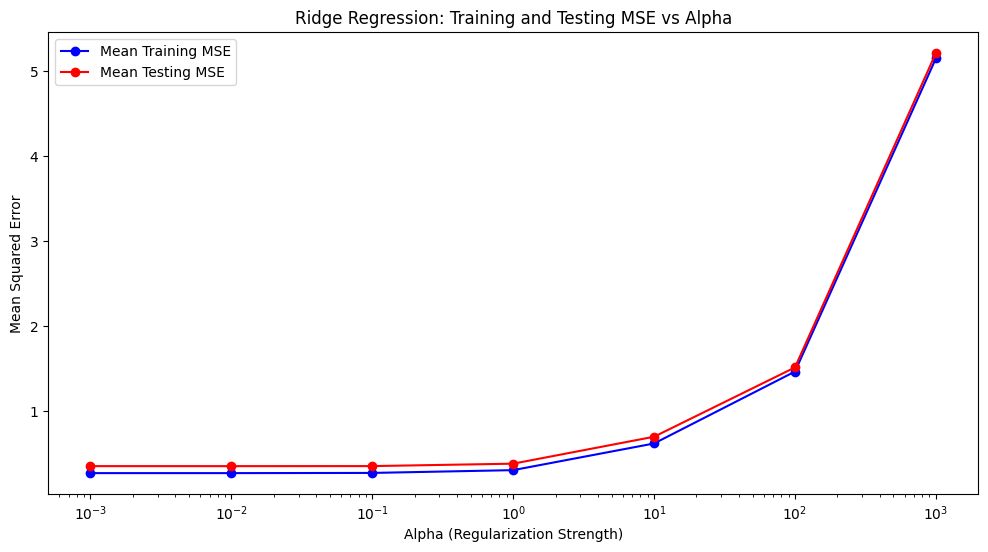

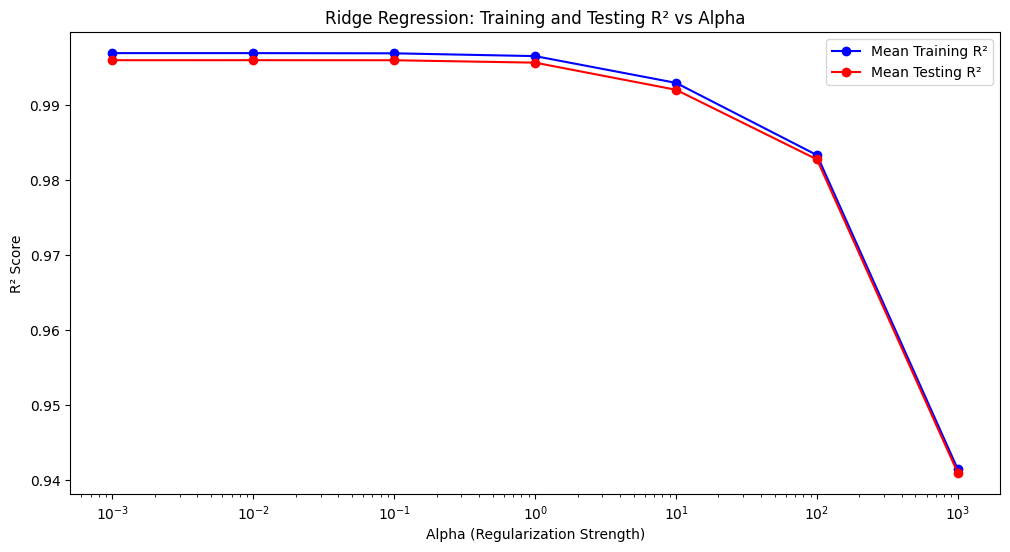

Test MSE with best alpha (MSE): 0.25916368891715447
Test R² with best alpha (R²): 0.9971337639707976


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def perform_grid_search(scoring_metric):
    grid_search = GridSearchCV(
        estimator=ridge,
        param_grid=param_grid,
        scoring=scoring_metric,
        cv=5,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    return grid_search
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'alpha': alphas}

# Initialize Ridge regression
ridge = Ridge()

# Perform grid search with MSE
grid_search_mse = perform_grid_search('neg_mean_squared_error')
mean_train_mse_scores = -grid_search_mse.cv_results_['mean_train_score']
mean_test_mse_scores = -grid_search_mse.cv_results_['mean_test_score']
best_alpha_mse = grid_search_mse.best_params_['alpha']
print(f"Best alpha (MSE): {best_alpha_mse}")

# Perform grid search with R²
grid_search_r2 = perform_grid_search('r2')
mean_train_r2_scores = grid_search_r2.cv_results_['mean_train_score']
mean_test_r2_scores = grid_search_r2.cv_results_['mean_test_score']
best_alpha_r2 = grid_search_r2.best_params_['alpha']
print(f"Best alpha (R²): {best_alpha_r2}")

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_mse_scores, marker="o", label="Mean Training MSE", color="blue")
plt.plot(alphas, mean_test_mse_scores, marker="o", label="Mean Testing MSE", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Training and Testing MSE vs Alpha')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_r2_scores, marker="o", label="Mean Training R²", color="blue")
plt.plot(alphas, mean_test_r2_scores, marker="o", label="Mean Testing R²", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Training and Testing R² vs Alpha')
plt.legend()
plt.show()

# Evaluate the best model for each metric
best_ridge_mse = grid_search_mse.best_estimator_
y_test_pred_mse = best_ridge_mse.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred_mse)
print(f"Test MSE with best alpha (MSE): {test_mse}")

best_ridge_r2 = grid_search_r2.best_estimator_
y_test_pred_r2 = best_ridge_r2.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_r2)
print(f"Test R² with best alpha (R²): {test_r2}")


## Kiểm tra sử dụng các biểu đồ partial residual plot

### So sánh ảnh hưởng giữa Adult_morality và GDP_per_capita với Life_expectancy

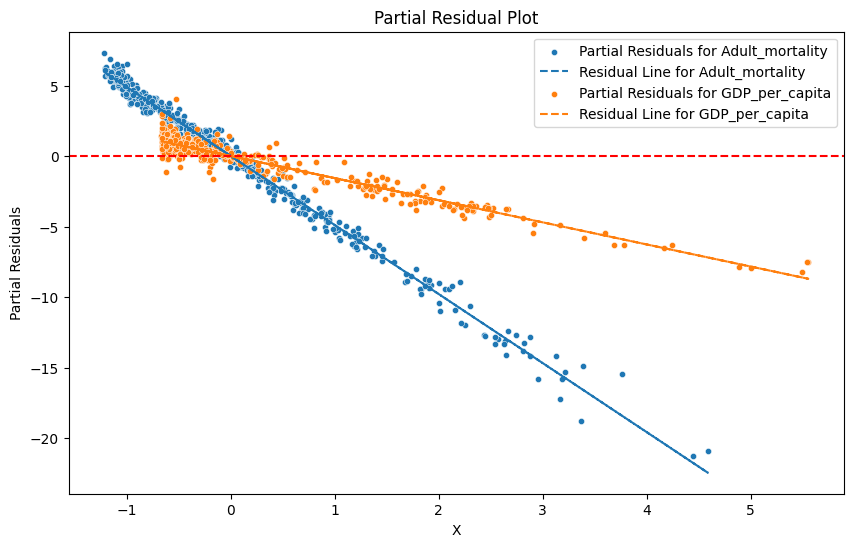

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

for i, feature in enumerate(['Adult_mortality', 'GDP_per_capita']):
    partial_residuals = residuals +  model.coef_[i] * X_test[feature]
    sns.scatterplot(x=X_test[feature], y=partial_residuals, label=f'Partial Residuals for {feature}', s=20)
    residual_line_model = LinearRegression()
    residual_line_model.fit(X_test[feature].values.reshape(-1, 1), partial_residuals)

    residual_line = residual_line_model.predict(X_test[feature].values.reshape(-1, 1))
    plt.plot(X_test[feature], residual_line, label=f'Residual Line for {feature}', linestyle='--')

plt.axhline(0, color='red', linestyle='--')

plt.title('Partial Residual Plot')
plt.xlabel('X')
plt.ylabel('Partial Residuals')

# Show legend
plt.legend()

# Show plot
plt.show()

### So sánh ảnh hưởng giữa các biến số đã lựa chọn

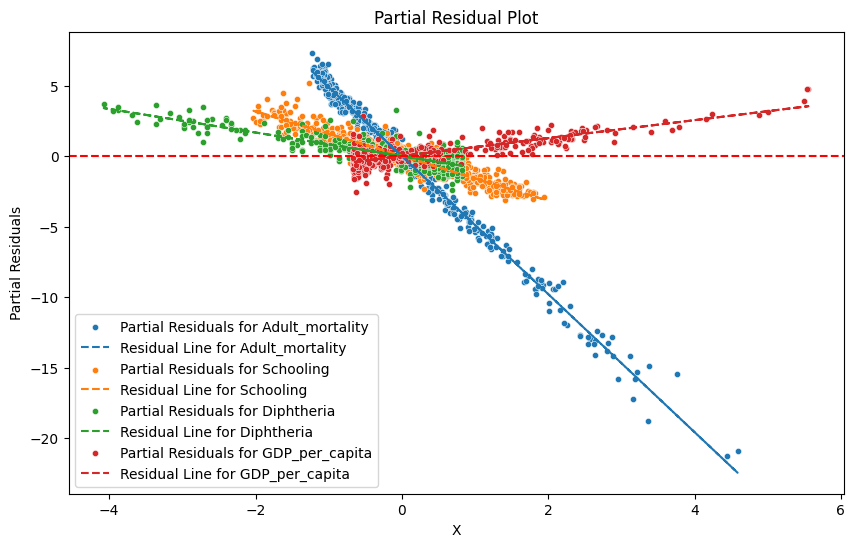

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

for i, feature in enumerate(['Adult_mortality', 'Schooling', 'Diphtheria', 'GDP_per_capita']):
    partial_residuals = residuals +  model.coef_[i] * X_test[feature]
    sns.scatterplot(x=X_test[feature], y=partial_residuals, label=f'Partial Residuals for {feature}', s=20)
    residual_line_model = LinearRegression()
    residual_line_model.fit(X_test[feature].values.reshape(-1, 1), partial_residuals)

    residual_line = residual_line_model.predict(X_test[feature].values.reshape(-1, 1))
    plt.plot(X_test[feature], residual_line, label=f'Residual Line for {feature}', linestyle='--')

plt.axhline(0, color='red', linestyle='--')

plt.title('Partial Residual Plot')
plt.xlabel('X')
plt.ylabel('Partial Residuals')

# Show legend
plt.legend()

# Show plot
plt.show()

## Kịch bản chỉ sử dụng biến Adult_mortality

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Adult_mortality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Squared Error: 9.207143815101952
R-squared score: 0.8981730525632022


Best alpha (MSE): 10000
Best alpha (R²): 10000


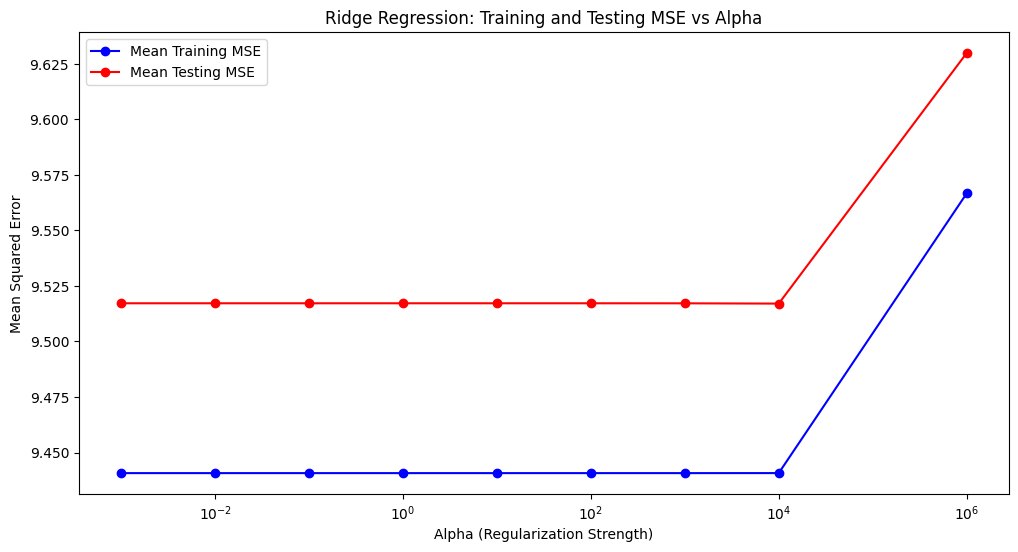

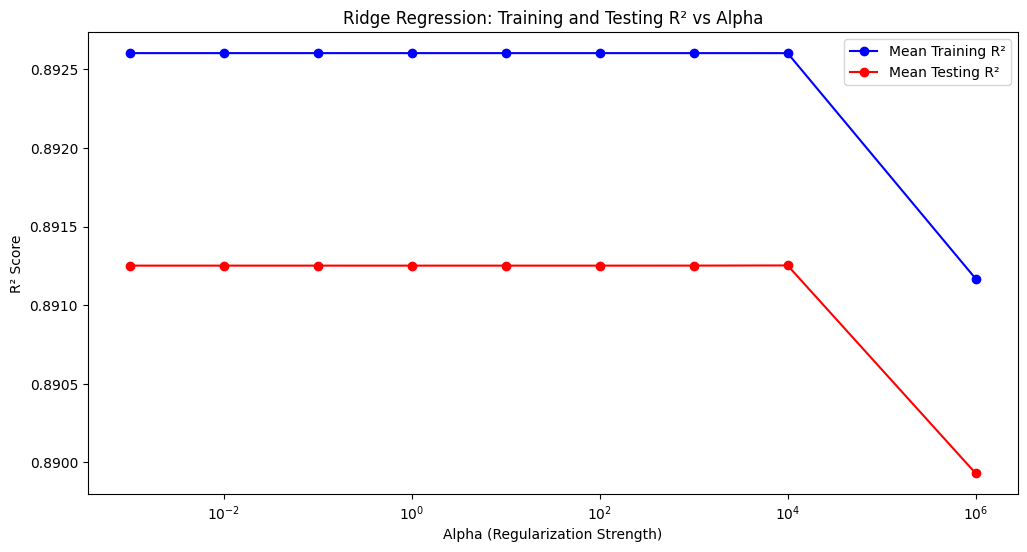

Test MSE with best alpha (MSE): 9.20695864896063
Test R² with best alpha (R²): 0.8981751004190106


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def perform_grid_search(scoring_metric):
    grid_search = GridSearchCV(
        estimator=ridge,
        param_grid=param_grid,
        scoring=scoring_metric,
        cv=5,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    return grid_search
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000]
param_grid = {'alpha': alphas}

# Initialize Ridge regression
ridge = Ridge()

# Perform grid search with MSE
grid_search_mse = perform_grid_search('neg_mean_squared_error')
mean_train_mse_scores = -grid_search_mse.cv_results_['mean_train_score']
mean_test_mse_scores = -grid_search_mse.cv_results_['mean_test_score']
best_alpha_mse = grid_search_mse.best_params_['alpha']
print(f"Best alpha (MSE): {best_alpha_mse}")

# Perform grid search with R²
grid_search_r2 = perform_grid_search('r2')
mean_train_r2_scores = grid_search_r2.cv_results_['mean_train_score']
mean_test_r2_scores = grid_search_r2.cv_results_['mean_test_score']
best_alpha_r2 = grid_search_r2.best_params_['alpha']
print(f"Best alpha (R²): {best_alpha_r2}")

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_mse_scores, marker="o", label="Mean Training MSE", color="blue")
plt.plot(alphas, mean_test_mse_scores, marker="o", label="Mean Testing MSE", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Training and Testing MSE vs Alpha')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_r2_scores, marker="o", label="Mean Training R²", color="blue")
plt.plot(alphas, mean_test_r2_scores, marker="o", label="Mean Testing R²", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Training and Testing R² vs Alpha')
plt.legend()
plt.show()

# Evaluate the best model for each metric
best_ridge_mse = grid_search_mse.best_estimator_
y_test_pred_mse = best_ridge_mse.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred_mse)
print(f"Test MSE with best alpha (MSE): {test_mse}")

best_ridge_r2 = grid_search_r2.best_estimator_
y_test_pred_r2 = best_ridge_r2.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_r2)
print(f"Test R² with best alpha (R²): {test_r2}")

## Kịch bản chỉ sử dụng biến GDP_per_capita

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['GDP_per_capita']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared score: {r2}')

Mean Squared Error: 60.18130895969226
R-squared score: 0.33442128121592607


Best alpha (MSE): 1000
Best alpha (R²): 1000


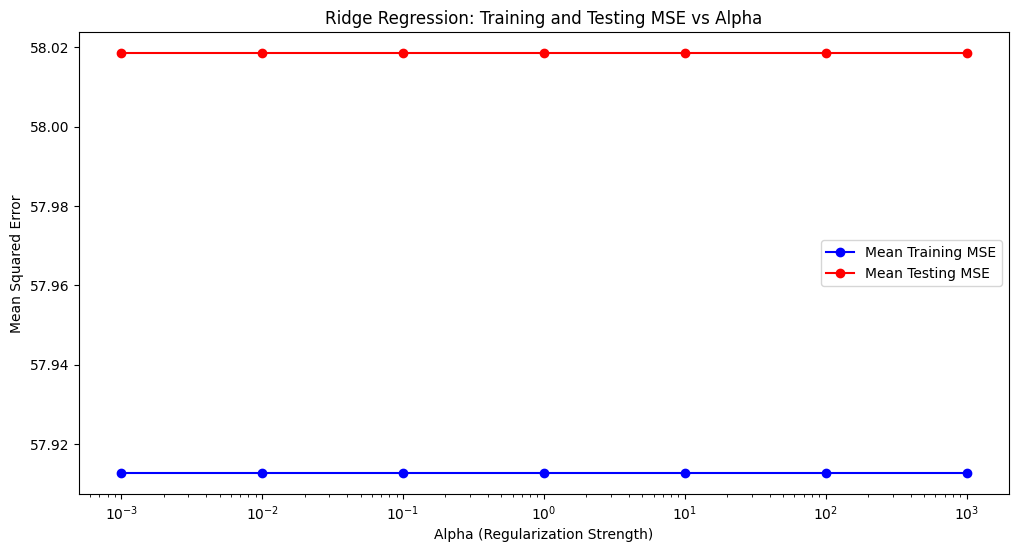

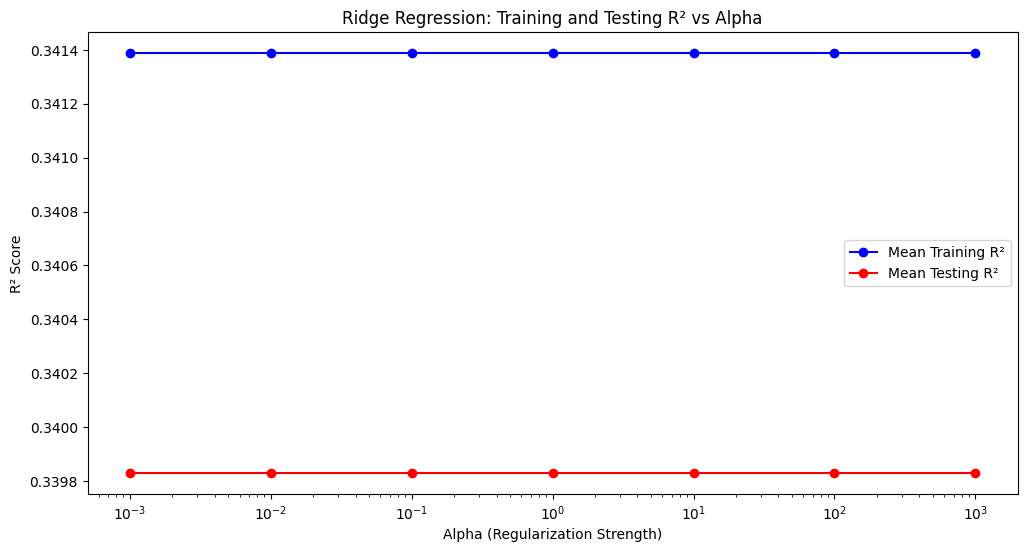

Test MSE with best alpha (MSE): 60.1813089524259
Test R² with best alpha (R²): 0.3344212812962888


In [ ]:
def perform_grid_search(scoring_metric):
    grid_search = GridSearchCV(
        estimator=ridge,
        param_grid=param_grid,
        scoring=scoring_metric,
        cv=5,
        return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    return grid_search
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'alpha': alphas}

# Initialize Ridge regression
ridge = Ridge()

# Perform grid search with MSE
grid_search_mse = perform_grid_search('neg_mean_squared_error')
mean_train_mse_scores = -grid_search_mse.cv_results_['mean_train_score']
mean_test_mse_scores = -grid_search_mse.cv_results_['mean_test_score']
best_alpha_mse = grid_search_mse.best_params_['alpha']
print(f"Best alpha (MSE): {best_alpha_mse}")

# Perform grid search with R²
grid_search_r2 = perform_grid_search('r2')
mean_train_r2_scores = grid_search_r2.cv_results_['mean_train_score']
mean_test_r2_scores = grid_search_r2.cv_results_['mean_test_score']
best_alpha_r2 = grid_search_r2.best_params_['alpha']
print(f"Best alpha (R²): {best_alpha_r2}")

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_mse_scores, marker="o", label="Mean Training MSE", color="blue")
plt.plot(alphas, mean_test_mse_scores, marker="o", label="Mean Testing MSE", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Training and Testing MSE vs Alpha')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alphas, mean_train_r2_scores, marker="o", label="Mean Training R²", color="blue")
plt.plot(alphas, mean_test_r2_scores, marker="o", label="Mean Testing R²", color="red")
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Training and Testing R² vs Alpha')
plt.legend()
plt.show()

# Evaluate the best model for each metric
best_ridge_mse = grid_search_mse.best_estimator_
y_test_pred_mse = best_ridge_mse.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred_mse)
print(f"Test MSE with best alpha (MSE): {test_mse}")

best_ridge_r2 = grid_search_r2.best_estimator_
y_test_pred_r2 = best_ridge_r2.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred_r2)
print(f"Test R² with best alpha (R²): {test_r2}")